This notebook shows examples of how to use cratersfd to make the standard plots from crater count data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import pickle as pkl
from cratersfd import *
%matplotlib inline

Load example synthetic data.  This is an NPF synthetic with 3,000 craters focusing on the $D>3km$ part of the NPF where the production function has the most structure.

In [2]:
area = 10000
d_min = 3.0
ds = np.loadtxt('../data/example_npf_synthetic.csv')

By convention, we store the data as numpy arrays of diameter in km.  Here is what ds looks like:

In [3]:
ds

array([17.92710448,  4.1243386 ,  3.8830679 , ..., 23.32574035,
        3.01913915,  5.11797185])

## Differential Plots

To plot the differential plot, use the plot_sash() algorithm.

1.10645 seconds


(array([  3.        ,   3.00139765,   3.00279596, ..., 315.75716641,
        315.90427273, 316.05144758]),
 array([2.14940294e-01, 2.14605379e-01, 2.13614805e-01, ...,
        2.52156148e-07, 2.51748077e-07, 2.51340667e-07]))

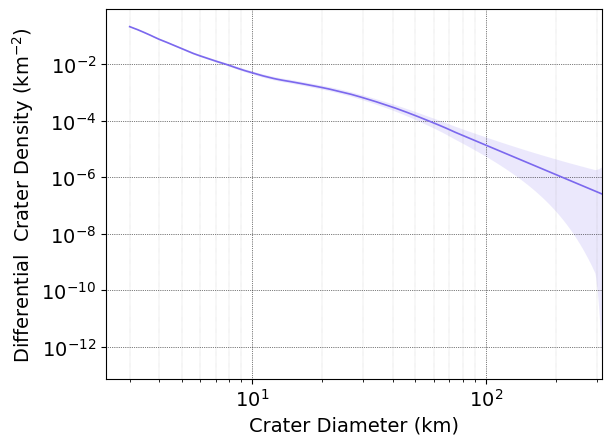

In [4]:
plot_sash(ds, area, d_min=d_min)

These plots can be modified with Matplotlib commands.  Here, we change the xlim and ylim.

1.12023 seconds


(1e-09, 0.3)

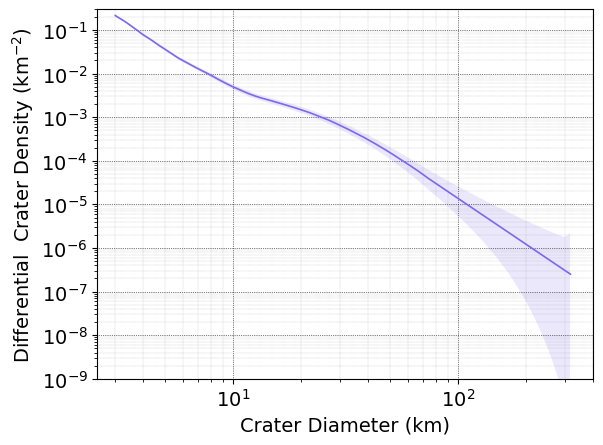

In [5]:
plot_sash(ds, area, d_min=d_min)
plt.xlim([2.5, 400])
plt.ylim([1e-9, 3e-1])

Here is its full range of optimizable parameters with their defaults.  The bin_width_exponent and growth_rate parameters control the binning scheme the algorithm uses and may be worth adjusting to optimize performance for your data.

1.18986 seconds


(1e-09, 0.3)

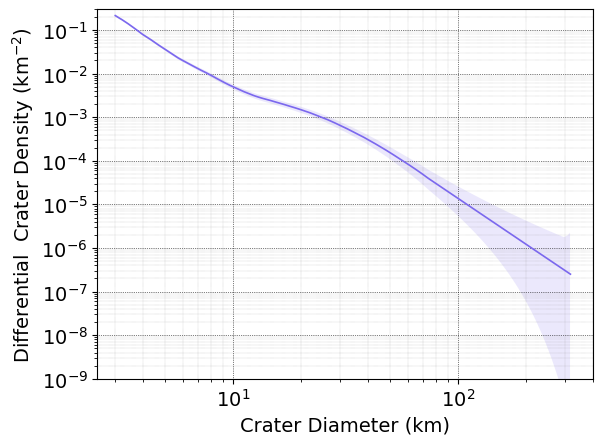

In [6]:
plot_sash(
    ds, area, d_min=None, 
    bin_width_exponent=per_decade(18), d_max=None, 
    growth_rate=1.2, n_points=10000, n_shifts=200,
    color='mediumslateblue', plot_lines=False, lw=1.2,
    line_color='mediumslateblue', line_lw=0.2,
    min_count=1, n_iterations=5, n_alpha_points=10000,
    return_alphas=False, plot_error=True,
    fill_alpha=0.15, kernel=None, reduction_factor=1.0,
    error_bin_width_exponent=per_decade(18),
    error_downsample=10, kind='log'
)
plt.xlim([2.5, 400])
plt.ylim([1e-9, 3e-1])

To make a traditional binned differential plot, use the plot_differential() function.  The traditional form of the differential plot shows the count in a bin divided by the bin width (in linear space). Under the Arvidson et al. (1979) standards, is plotted against the linear mean of the bin edges.

(1e-09, 0.3)

<Figure size 640x480 with 0 Axes>

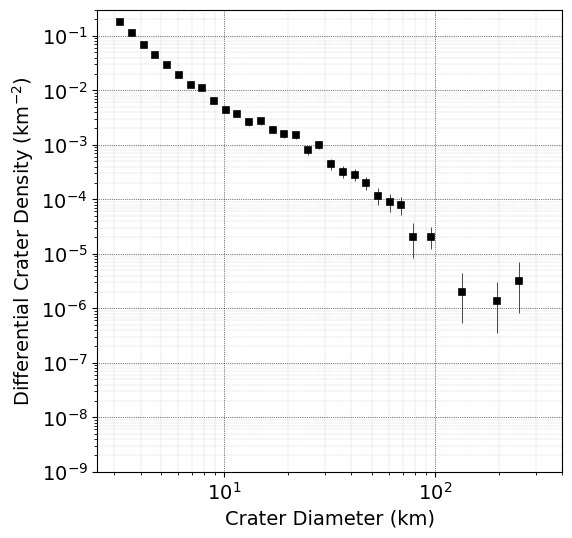

In [7]:
plot_differential(ds, area, d_min=d_min)
plt.xlim([2.5, 400])
plt.ylim([1e-9, 3e-1])

Here we change the point size and plot the two methods together for comparison.

1.12063 seconds


(1e-09, 0.3)

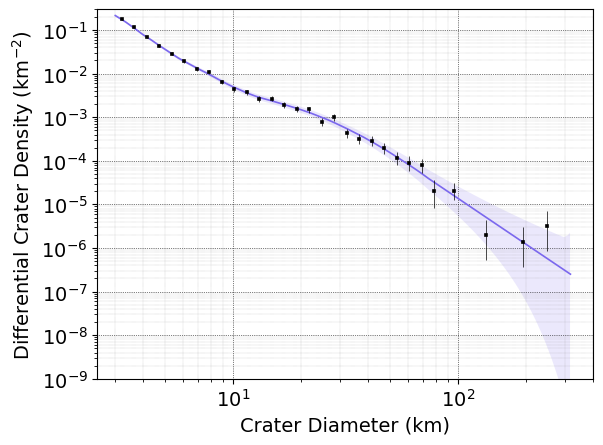

In [8]:
plot_sash(ds, area, d_min=d_min)
plot_differential(ds, area, d_min=d_min, ms=2)
plt.xlim([2.5, 400])
plt.ylim([1e-9, 3e-1])

By default, these plots use log method error bars.  To use the traditional sqrt(N) error bars, set kind='sqrt(N)'.

(1e-09, 0.3)

<Figure size 640x480 with 0 Axes>

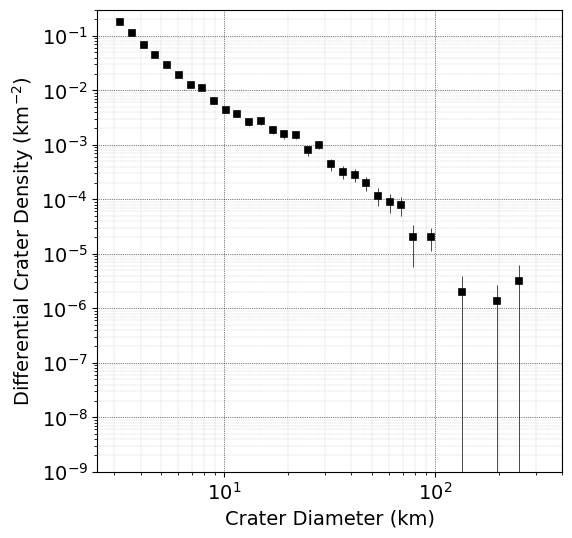

In [9]:
plot_differential(ds, area, d_min=d_min, kind='sqrt(N)')
plt.xlim([2.5, 400])
plt.ylim([1e-9, 3e-1])

Because of bin width artifacts, the point in the traditional form of the differential plot does not quite actually fall on the true continuous differential plot function.  To adjust for this, we can use the Michael (2013) correction if we know the underlying slope.  To apply this, set do_correction=True and set the production function to use for the correction with the pf variable.  Here, we use the "new" Neukum Production Function (NPF).  However, this is circular reasoning because typically we look at plots in order to know their shape, and this method requires knowing the shape.

(1e-09, 0.3)

<Figure size 640x480 with 0 Axes>

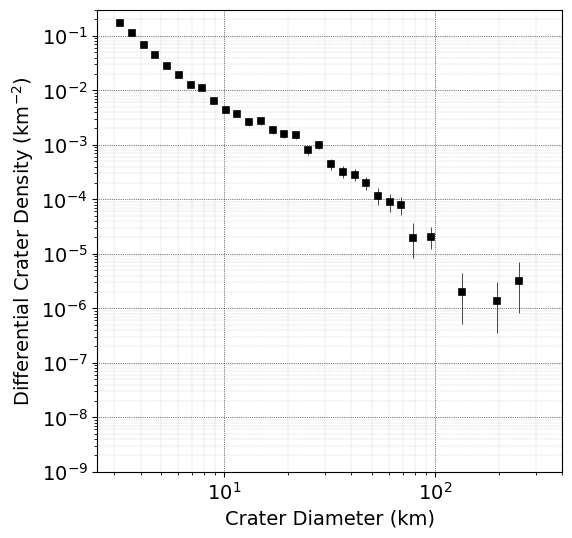

In [10]:
plot_differential(
    ds, area, d_min=d_min, do_correction=True, pf=npf_new_loglog
)
plt.xlim([2.5, 400])
plt.ylim([1e-9, 3e-1])

Another method for visualizing the binned differential plot is to use the Truncated Pareto method to calculate the slope PDF from the distribution of points in the bin and plot the true continuous differential function.  To do this, use the plot_differential_binned() function.

(1e-09, 0.3)

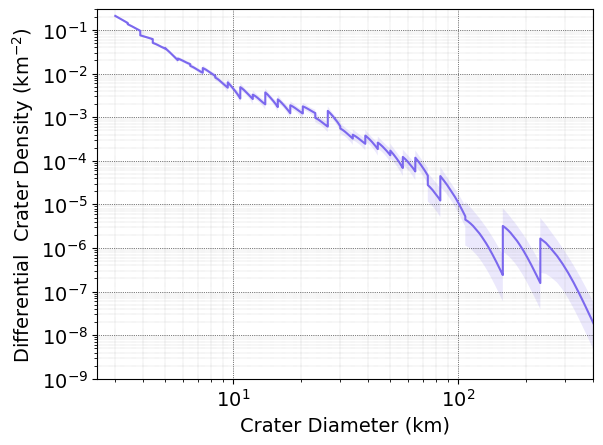

In [11]:
plot_differential_binned(ds, area, d_min=d_min)
plt.xlim([2.5, 400])
plt.ylim([1e-9, 3e-1])

## Cumulative Plots

Here's how to make a cumulative plot.

<Figure size 640x480 with 0 Axes>

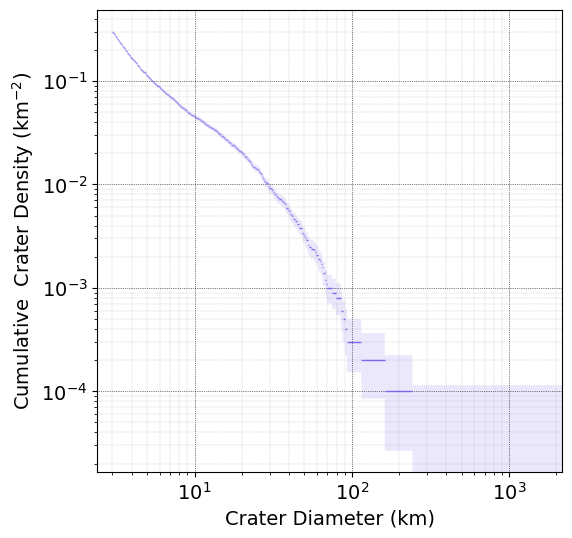

In [12]:
plot_cumulative(ds, area, d_min=d_min)

The parameter d_min gives the minimum diameter of craters counted.  If you don't specify d_min, then the last step will not be included, since it extends to d_min.  Effectively, the smallest crater will be treated as d_min.

<Figure size 640x480 with 0 Axes>

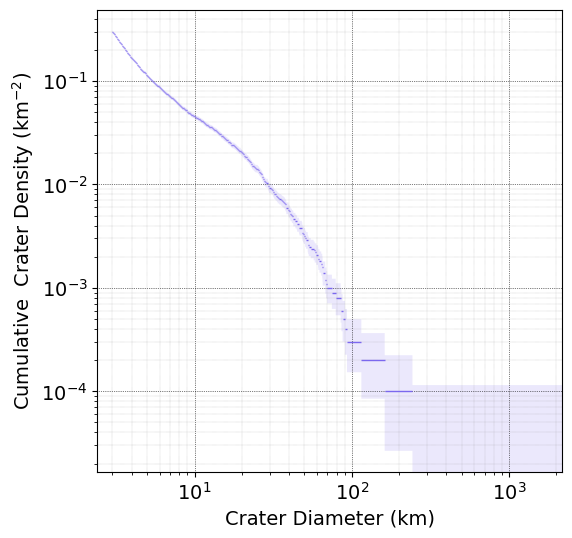

In [13]:
plot_cumulative(ds, area)

It can be modified extensively.  Here are its default parameters.

<Figure size 640x480 with 0 Axes>

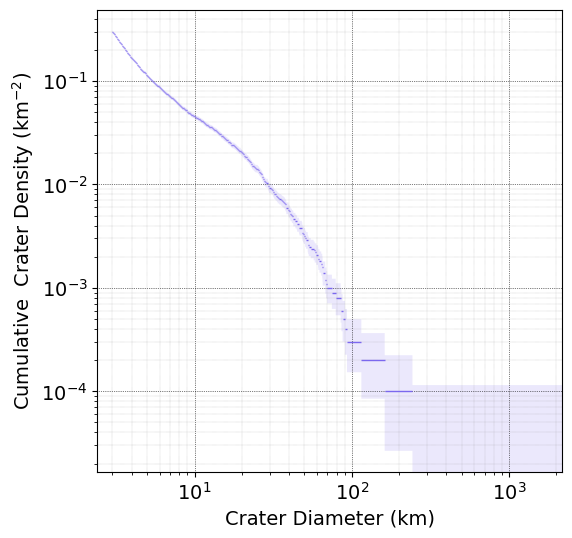

In [14]:
plot_cumulative(
    ds, area, color='mediumslateblue', alpha=1.0, plot_lines=True, ms=4,
    plot_points=False, plot_point_error_bars=False, point_color='same',
    center=False, d_min=None, d_max=10000, kind='log', fill_alpha=0.15,
    do_formatting=True, elinewidth=0.5, point_label=None,
    plot_bounds=False
)

To show the traditional form of the unbinned cumulative plot with points, as standardized by Arvidson et al. (1979), set plot_points=True, plot_point_error_bars=True, plot_lines=False, and kind='sqrt(N)'.

<Figure size 640x480 with 0 Axes>

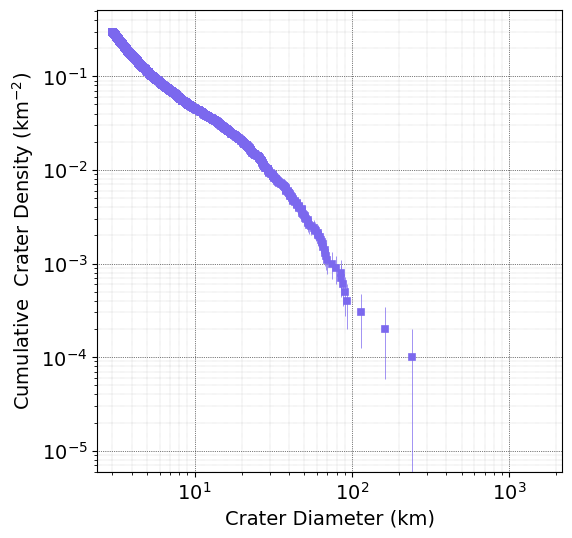

In [15]:
plot_cumulative(
    ds, area, d_min=d_min, plot_points=True, 
    plot_point_error_bars=True, plot_lines=False, 
    kind='sqrt(N)'
)

We can also produce the Arvidson et al. (1979) "binned" plot, which samples the cumulative count function at regular intervals.  The craters to the right of the sampling point are often referred to as craters within the "bin."  Here, it is important to specify d_min.

<Figure size 640x480 with 0 Axes>

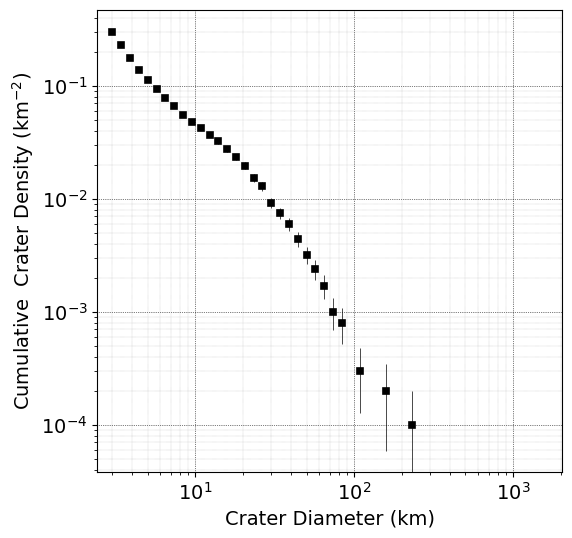

In [16]:
plot_cumulative_binned(ds, area, d_min=d_min, kind='sqrt(N)')

By default, it uses 18 "bins" per factor of ten.  For all binned plots, bins are specified with a bin_width_exponent parameter.  If we want to use square root of two bins, for instance, we set bin_width_exponent=0.5.

<Figure size 640x480 with 0 Axes>

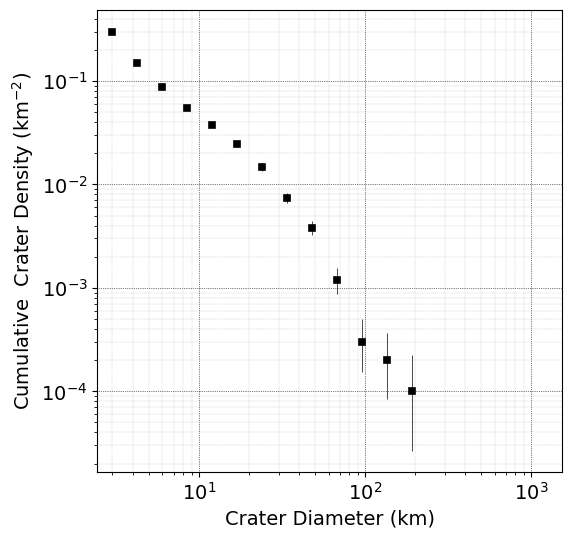

In [17]:
plot_cumulative_binned(
    ds, area, d_min=d_min, bin_width_exponent=0.5
)

By default, plot_cumulative_binned() samples the cumulative count function at regular intervals, but Arvidson et al. (1979) suggested adjusting the "bin" widths to avoid "bins" with no craters.  To reproduce this behavior, set skip_zero_crater_bins=True.

<Figure size 640x480 with 0 Axes>

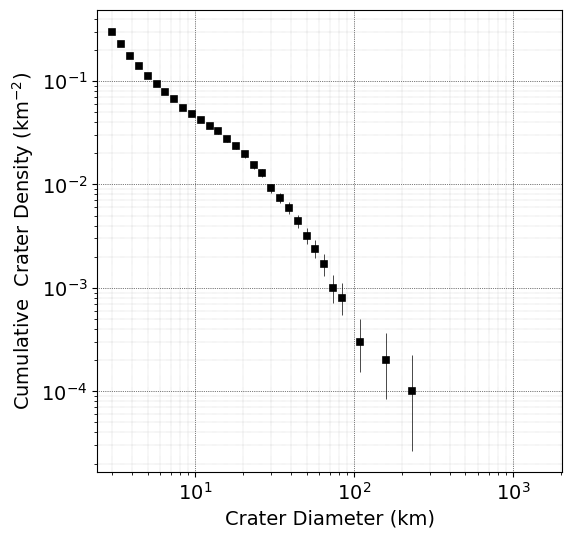

In [18]:
plot_cumulative_binned(
    ds, area, d_min=d_min, skip_zero_crater_bins=True
)

## R Plots

Here's how to make an R plot with the SASH algorithm.  An R plot is a differential plot normalized so that a line with a cumulative slope of -2 and a differential slope of -3 is flat.

Calculation time: 1.20065 seconds


(0.9, 80)

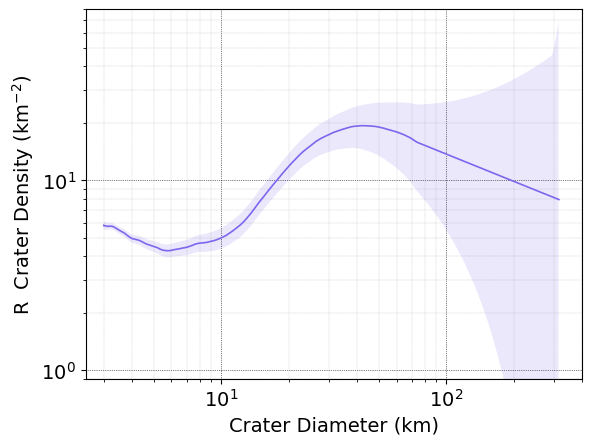

In [19]:
plot_sash_R(ds, area, d_min=d_min)
plt.xlim([2.5, 400])
plt.ylim([0.9, 80])

Here's how to make the traditional binned form of the R plot.

(0.9, 80)

<Figure size 640x480 with 0 Axes>

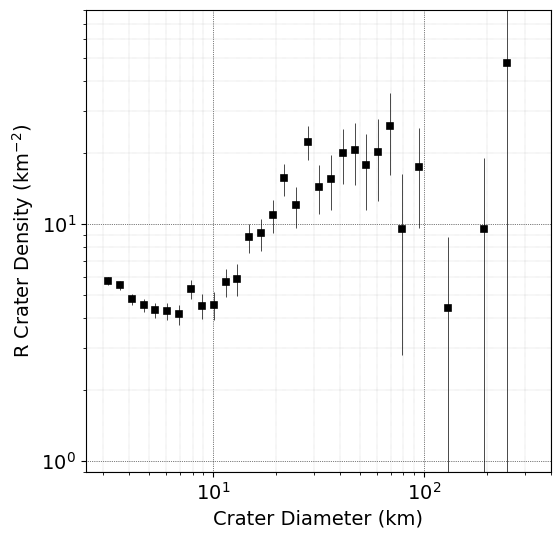

In [20]:
plot_R(ds, area, d_min=d_min, kind='sqrt(N)')
plt.xlim([2.5, 400])
plt.ylim([0.9, 80])

And here is the comparison.

Calculation time: 1.13218 seconds


(0.9, 80)

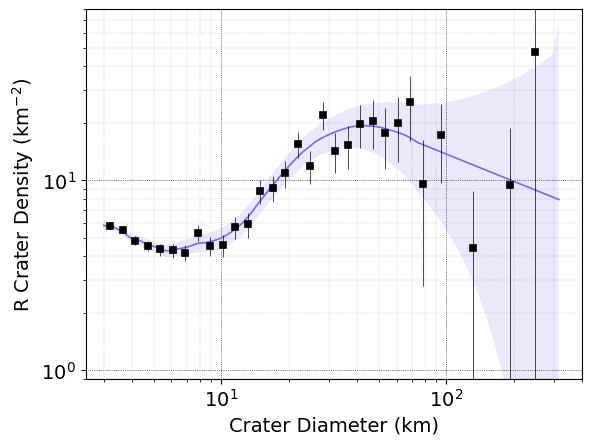

In [21]:
plot_sash_R(ds, area, d_min=d_min)
plot_R(ds, area, d_min=d_min, kind='sqrt(N)')
plt.xlim([2.5, 400])
plt.ylim([0.9, 80])